In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [99]:
# @title Parameters
h = 0.005
tau = 1.0
R = 1.0
u_rest = 0
total_time = 100

In [106]:
# @title Function

def iaf(u, du, I):
  threshold = 0.5
  ut = u + h*du(u, I)
  spike = 0

  if ut > threshold:
    ut = u_rest
    spike = 1

  return ut, spike

I = lambda t: (t > 10)*0.01*(t-10)

def simulate_model(du, time ):
  total_time = time
  T = int(total_time/h)
  t = np.zeros(T)
  U = np.zeros(T)
  spikes = []
  for i in range(T-1):
    U[i+1], s = iaf( U[i], du, I(t[i]))

    if s:
      spikes.append(t[i])

    t[i+1]= t[i] + h

  return U, spikes, t

def compute_firing_rate( spikes ):
  sigma = 0.3
  win = lambda y, mu: np.exp(-sigma*(y - mu)**2)
  NBins = 30
  dt = total_time/NBins
  fr = np.zeros(NBins)
  bin = np.zeros(NBins)
  spikes = np.array(spikes)

  for i in range(NBins):
    vals = np.array([win(i*dt, sp) for sp in spikes])
    fr[i] = np.sum(vals)*dt
    bin[i] = i*dt

  return bin, fr

Text(0.5, 0, 'time')

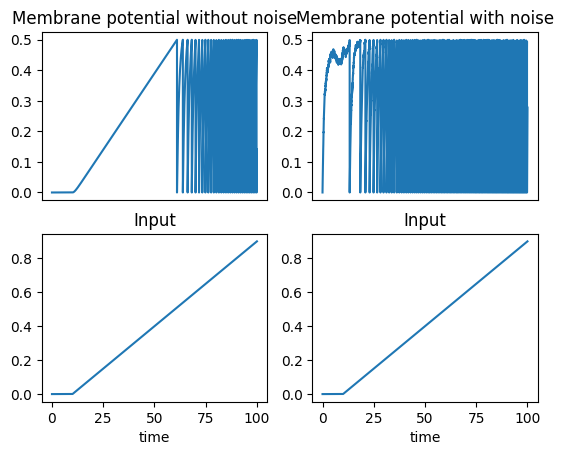

In [102]:

du_noise = lambda u, I: -(u - u_rest)/tau + R*I + 0.9*np.random.rand() # Define the model with noise
du = lambda u, I: -(u - u_rest)/tau + R*I # Define the model without noise

U_noise, spikes_noise, t_noise = simulate_model(du_noise, total_time)
U, spikes, t = simulate_model(du, total_time)

fig, ax = plt.subplots(2, 2)
ax[0, 0].plot(t, U)
ax[0, 0].set_title('Membrane potential without noise')
ax[0, 0].set_xticks([])
ax[1, 0].plot(t, I(t))
ax[1, 0].set_title('Input')
ax[1, 0].set_xlabel('time')

ax[0, 1].plot(t, U_noise)
ax[0, 1].set_title('Membrane potential with noise')
ax[0, 1].set_xticks([])
ax[1, 1].plot(t, I(t))
ax[1, 1].set_title('Input')
ax[1, 1].set_xlabel('time')


The firing rate

Text(0.5, 0, 'time')

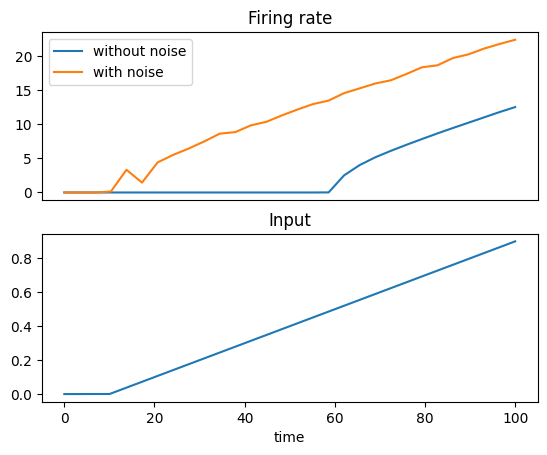

In [108]:
fig, ax = plt.subplots(2,1)
bin, fr = compute_firing_rate(spikes) # Compute the firing rate in 30 bins
bin_noise, fr_noise = compute_firing_rate(spikes_noise)

ax[0].plot(bin, fr, label = 'without noise')
ax[0].plot(bin_noise, fr_noise, label = 'with noise')
ax[0].set_title('Firing rate')
ax[0].set_xticks([])
ax[0].legend()

ax[1].plot(t, I(t))
ax[1].set_title('Input')
ax[1].set_xlabel('time')
